In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(color_codes = True)

In [6]:
file_path =  r'C:\Users\Gregory Bazuaye\Downloads/Sleep_health_and_lifestyle_dataset.csv'

dataset = pd.read_csv(file_path)

dataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## Data Preprocessing


In [8]:
dataset.select_dtypes(include = 'object').nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     3
dtype: int64

In [9]:
dataset.drop(columns = 'Person ID', inplace = True)
dataset.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [10]:
dataset['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [11]:
dataset['BMI Category'] = dataset['BMI Category'].replace('Normal Weight' , 'Normal')
dataset['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [12]:
dataset['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [64]:
#Checking for missing values
check_missing = dataset.isnull().sum() *100 / dataset.shape[0]
check_missing[check_missing > 0].sort_values(ascending = False)


Series([], dtype: float64)

## Exploratory Data Analysis

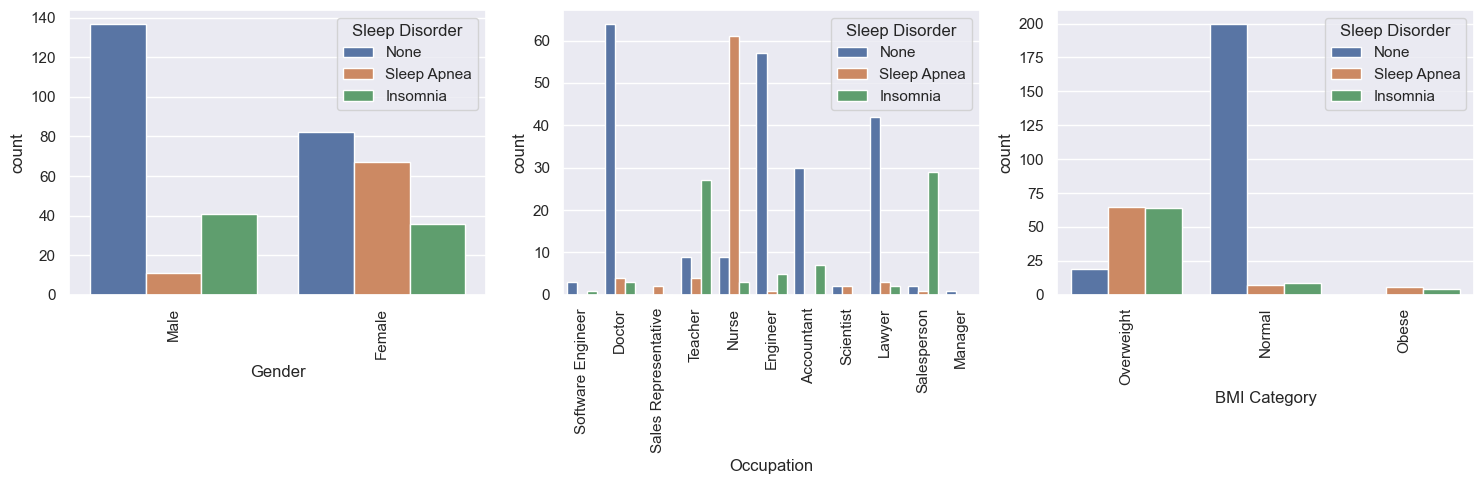

In [14]:
cat_vars = ['Gender' ,'Occupation', 'BMI Category']

#create figure with subplots


#plot to show how sleep disorders affect gender , people in certain occupations and BMI cATGORY

fig , axs = plt.subplots(nrows = 1 , ncols = 3 , figsize = (15 ,5))
axs = axs.flatten()

for i , var in enumerate(cat_vars):
        sb.countplot(x = var , hue = 'Sleep Disorder' , data = dataset , ax = axs[i])
        axs[i].set_xticklabels(axs[i].get_xticklabels() , rotation = 90)
    
fig.tight_layout()
plt.show()

In [ ]:
#We can say that females in general , people that work as nurses and overweight are more likely to be affected by sleep orders


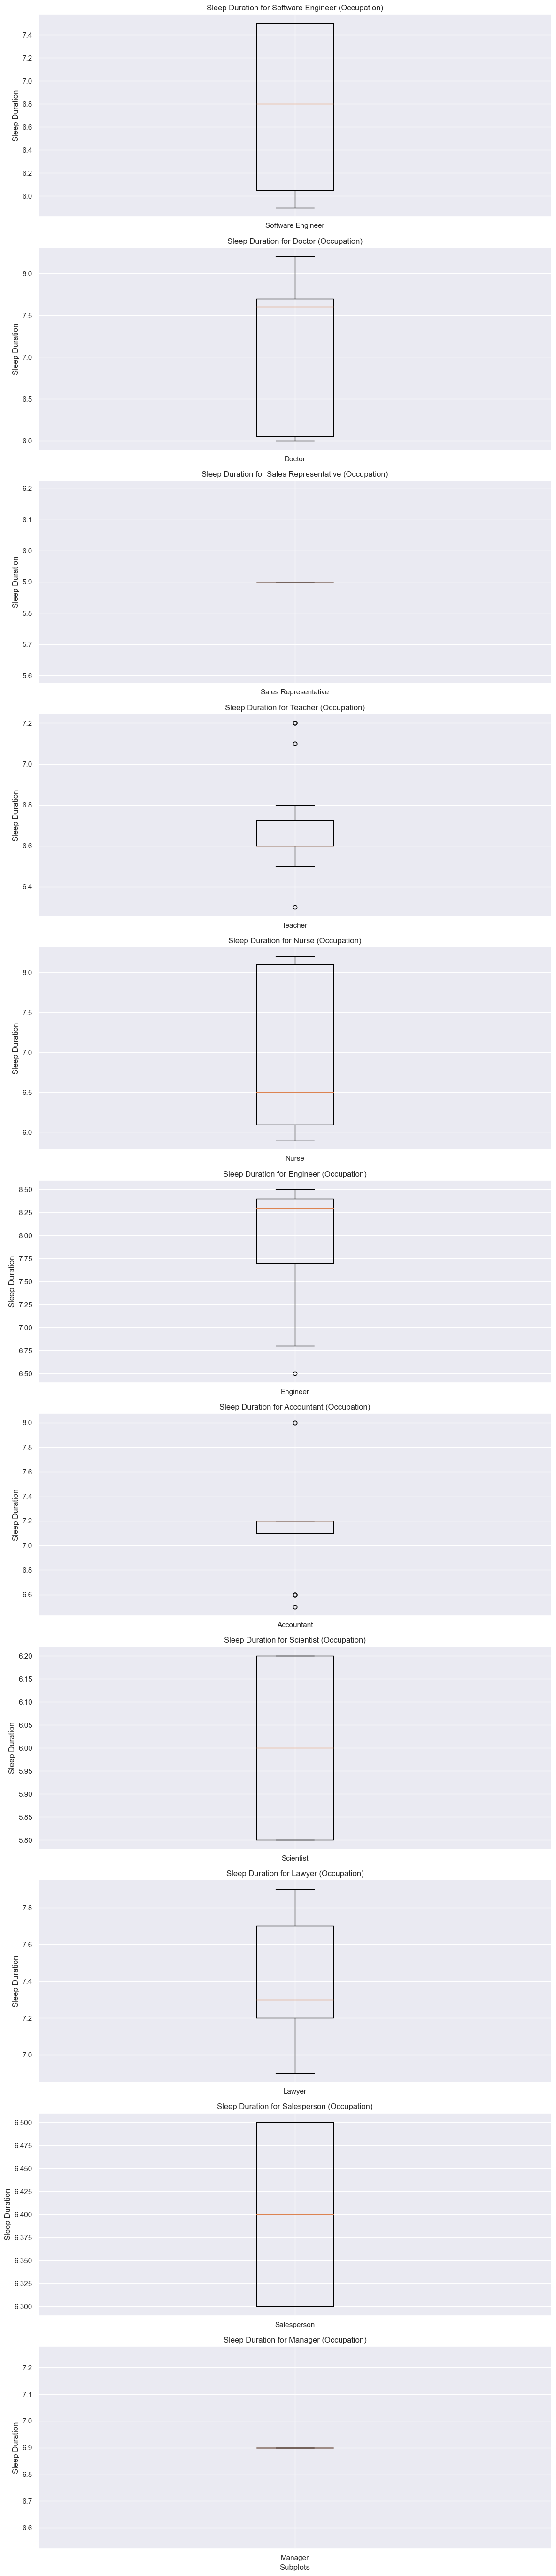

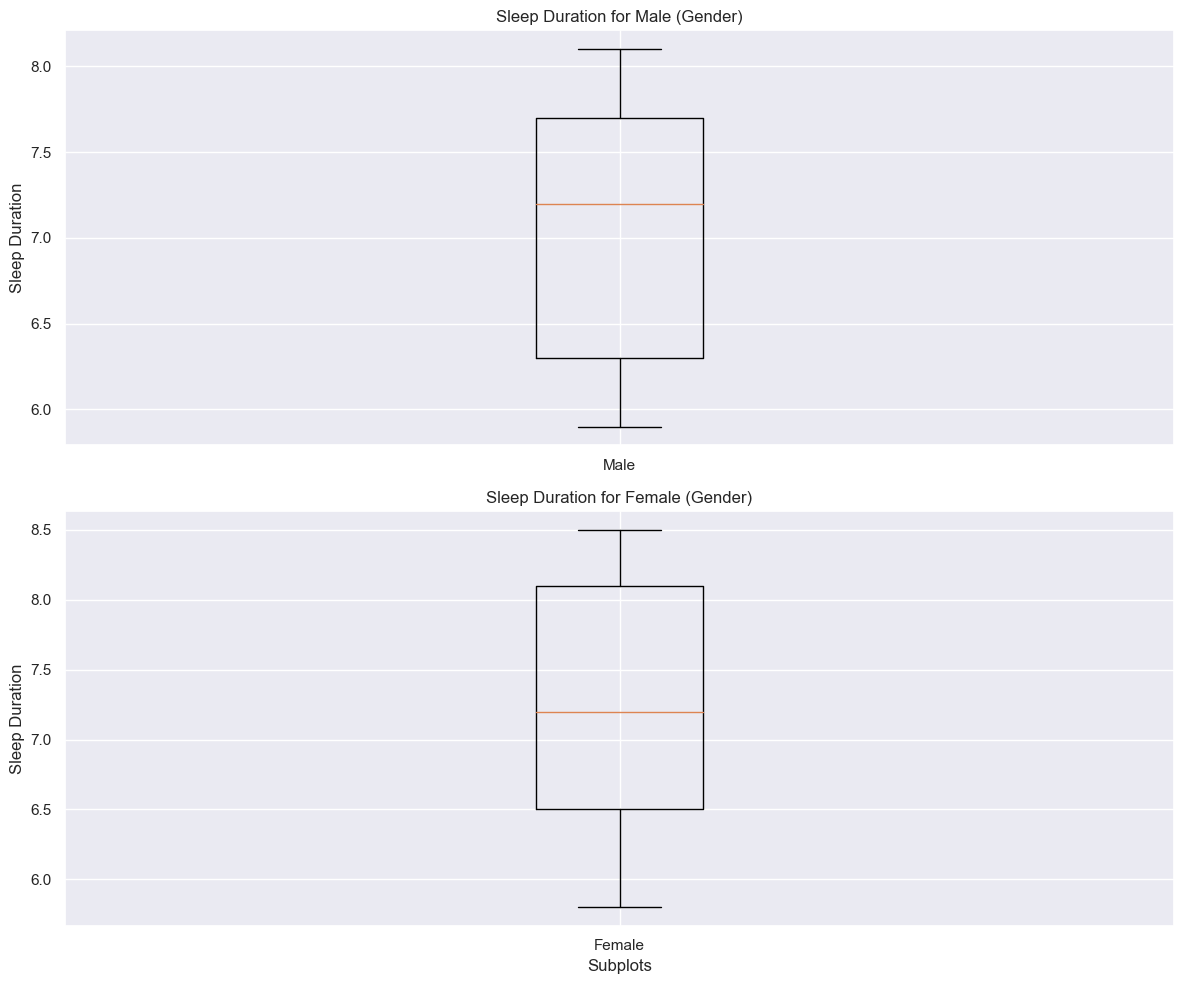

In [20]:

variables = ['Occupation', 'Gender']

# Loop through the variables and create separate subplots for each unique value
for variable in variables:
    unique_values = dataset[variable].unique()
    num_unique_values = len(unique_values)
    
    plt.figure(figsize=(12, 5 * num_unique_values))  # Adjust figure size based on the number of unique values
    
    for i, value in enumerate(unique_values, start=1):
        plt.subplot(num_unique_values, 1, i)  # Create a subplot
        subset = dataset[dataset[variable] == value]
        plt.boxplot(subset['Sleep Duration'], labels=[value])
        
        plt.ylabel('Sleep Duration')
        plt.title(f'Sleep Duration for {value} ({variable})')

    plt.xlabel('Subplots')
    plt.tight_layout()  # Adjust subplot spacing

plt.show()





In [ ]:
#after going throuhh the  boxplots we see the nurses have the lowest sleep duration on average

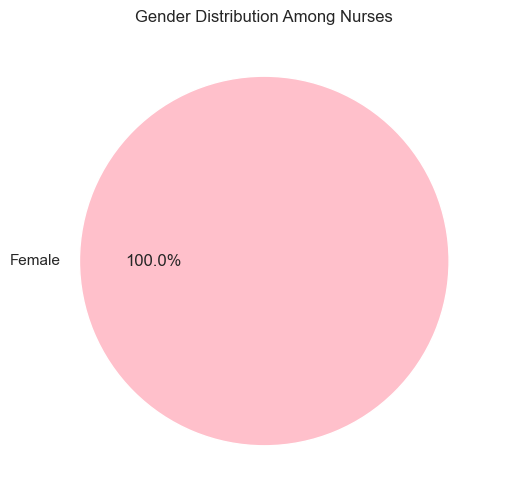

In [24]:
nurses = dataset[dataset['Occupation'] == 'Nurse']
gender_counts = nurses['Gender'].value_counts()

gender_counts = nurses['Gender'].value_counts()

# Create a pie chart to visualize the distribution
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Gender Distribution Among Nurses')
plt.show()

In [ ]:
# all of the nurses in this dataset are femake which explains why females are more likely experience sleep disorders .

In [17]:
females_affected = dataset[(dataset['Gender'] == 'Female') & (dataset['Sleep Disorder'] != 'None')]

females_affected.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
16,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Sleep Apnea
18,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Insomnia
30,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Sleep Apnea
31,Female,30,Nurse,6.4,5,35,7,Normal,130/86,78,4100,Insomnia
80,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea


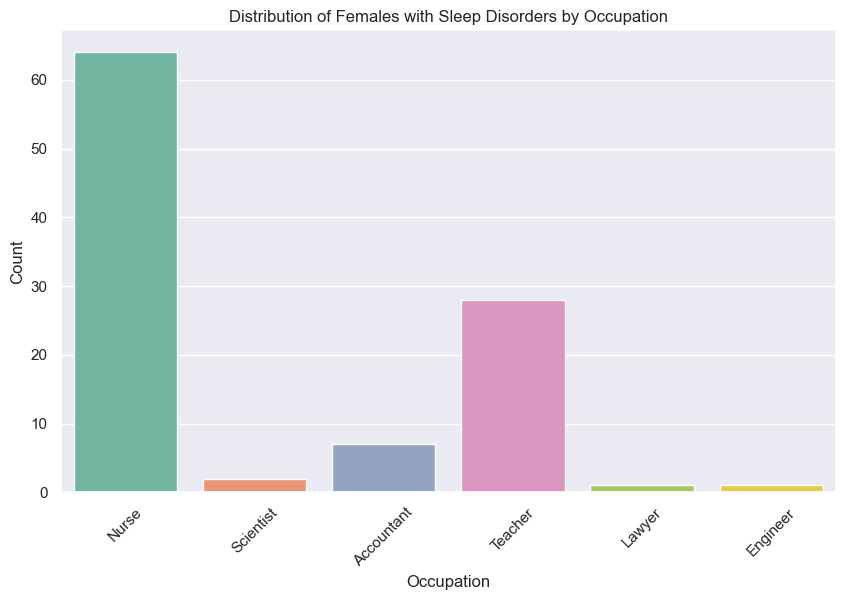

In [26]:
plt.figure(figsize=(10, 6)) 
sb.countplot(data=females_affected, x='Occupation', palette='Set2')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Females with Sleep Disorders by Occupation')
plt.xticks(rotation=45) 
plt.show()

In [ ]:
# the distibution shows women that are nurses are the most likely whic again backs the previous hypothesis
# and then teachers . Most teachers in this dataset are female

C:\Users\Gregory Bazuaye\AppData\Local\Temp\ipykernel_18760\1014354046.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


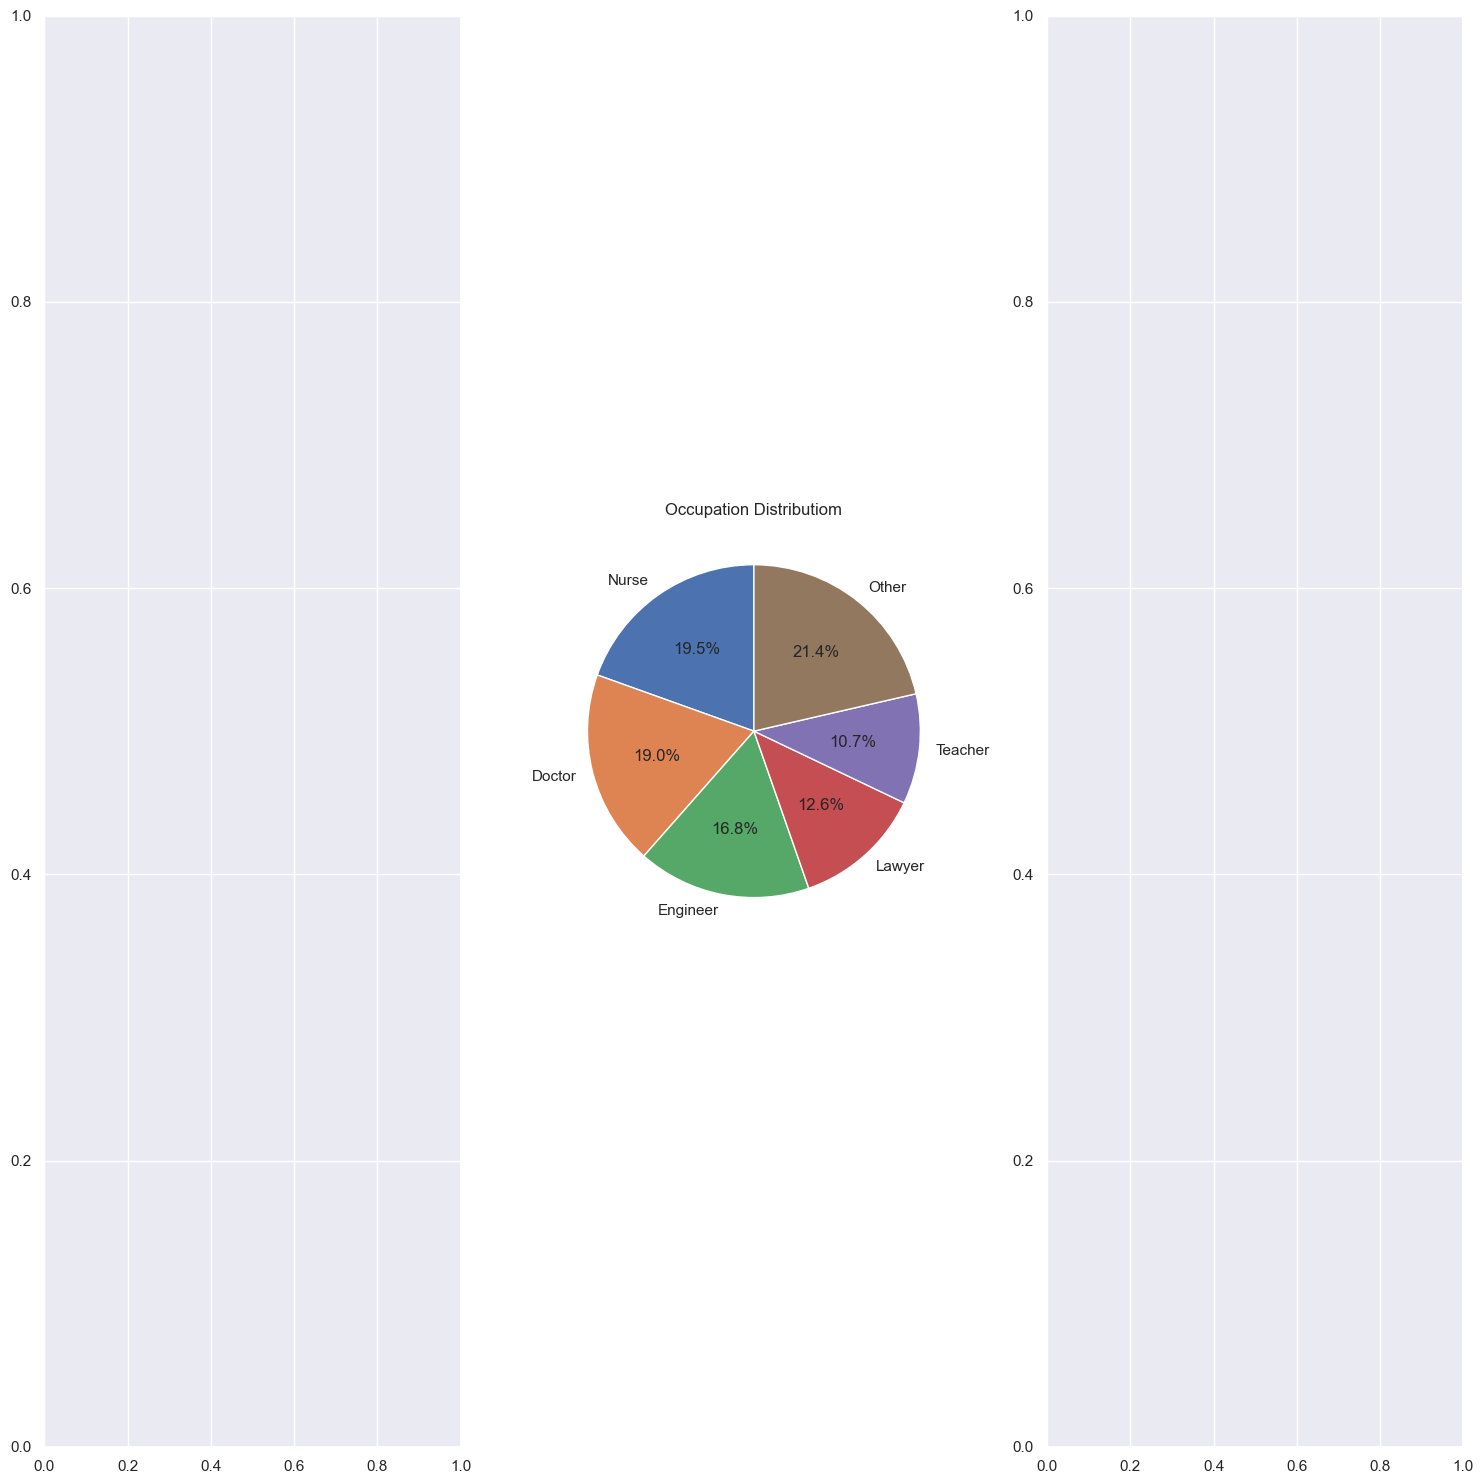

In [35]:
fig , axs =plt.subplots(nrows = 1 , ncols = 3 , figsize = (15,15))
max_categories = 5
for i , var in enumerate(cat_vars):
    if i < len (axs.flat):
        cat_counts = dataset[var].value_counts()
        
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum() , index = ['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)
            
            axs.flat[i].pie(cat_counts , labels = cat_counts.index, autopct = '%1.1f%%', startangle = 90)
            
            axs.flat[i].set_title(f'{var} Distributiom')
            
fig.tight_layout()
plt.show()
                


In [36]:
#nurses make up most of the dataset

In [51]:


dataset['Heart Rate'].dtype
dataset['Blood Pressure'].dtype

dataset[' Systolic Blood Pressure'] = dataset['Blood Pressure'].apply(lambda x: x.split('/')[0]).astype(int)
dataset[' Diastolic Blood Pressure'] = dataset['Blood Pressure'].apply(lambda x: x.split('/')[1]).astype(int)

num_vars = [var for var in dataset.columns if var not in cat_vars]

num_vars.remove('Sleep Disorder')
num_vars.remove('Blood Pressure')

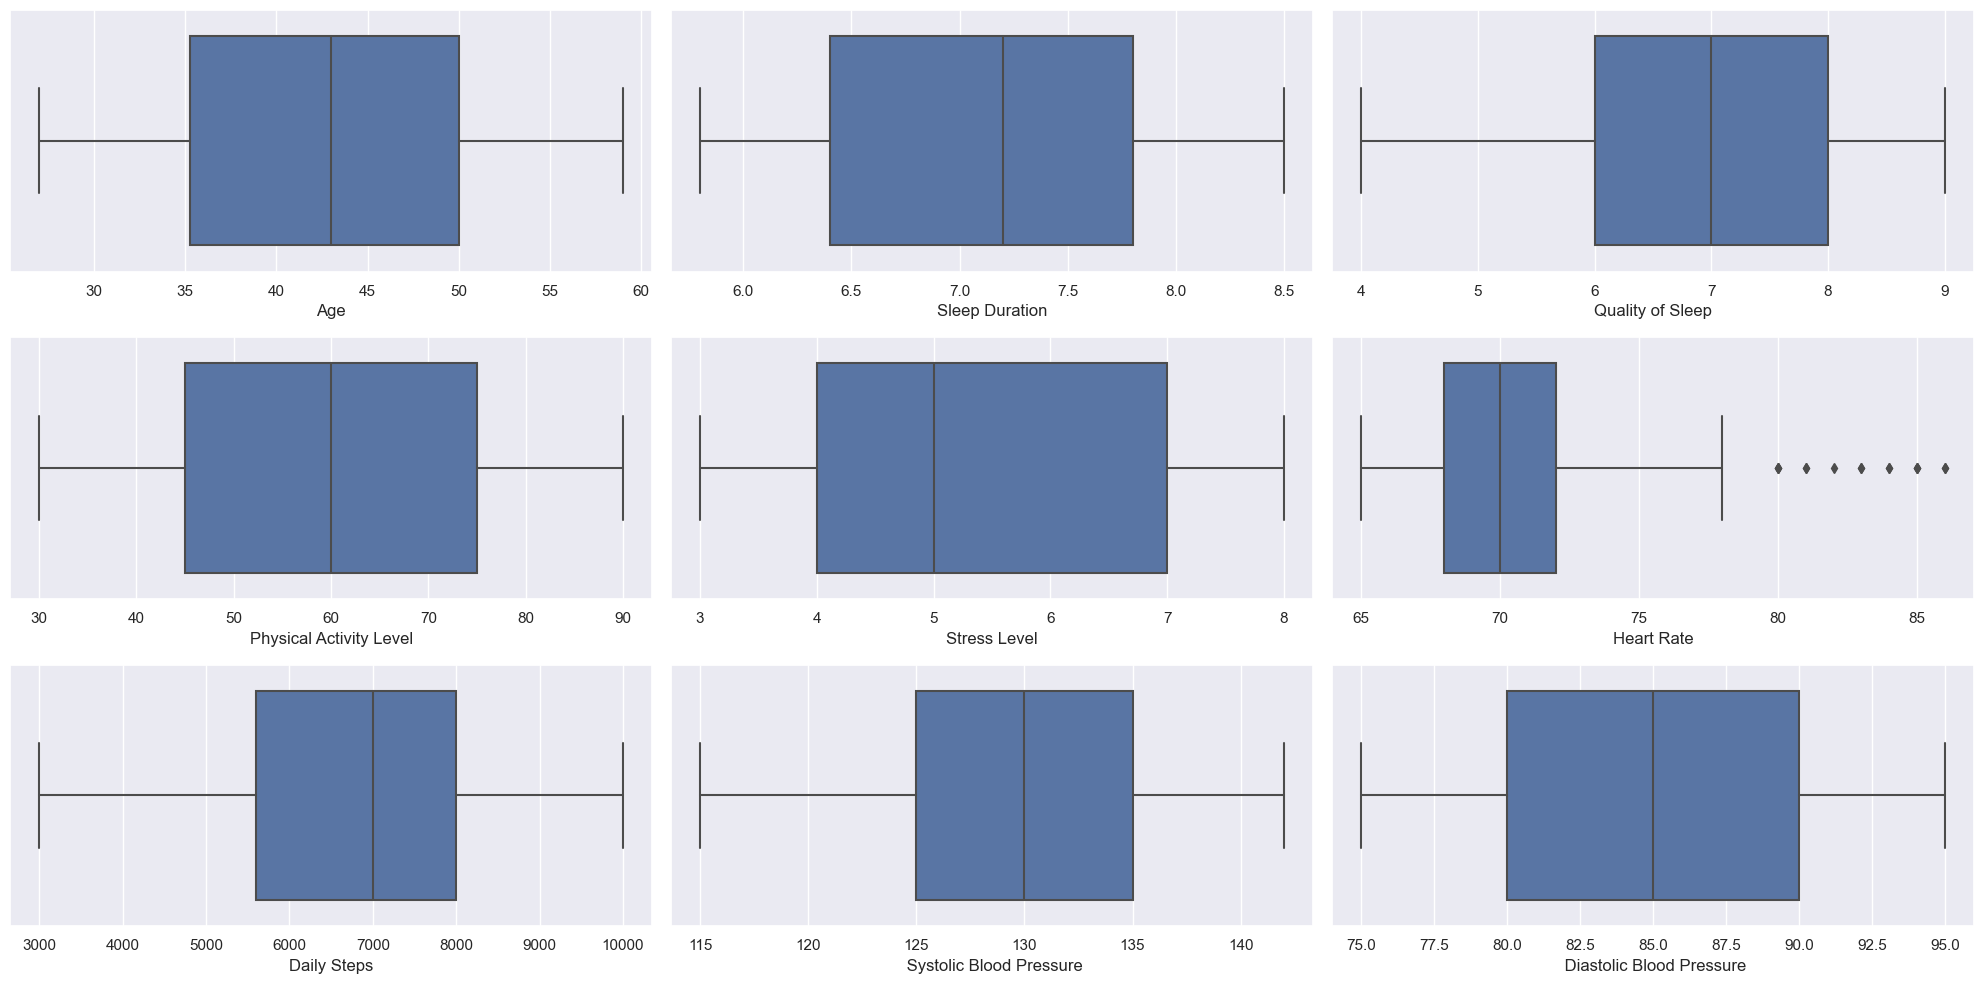

In [52]:
fig , axs = plt.subplots(nrows = 3 , ncols = 3 , figsize =(20,10))
axs = axs.flatten()

for i , variable in enumerate(num_vars):
    sb.boxplot(x = variable , data = dataset , ax = axs[i])
fig.tight_layout()
plt.show()

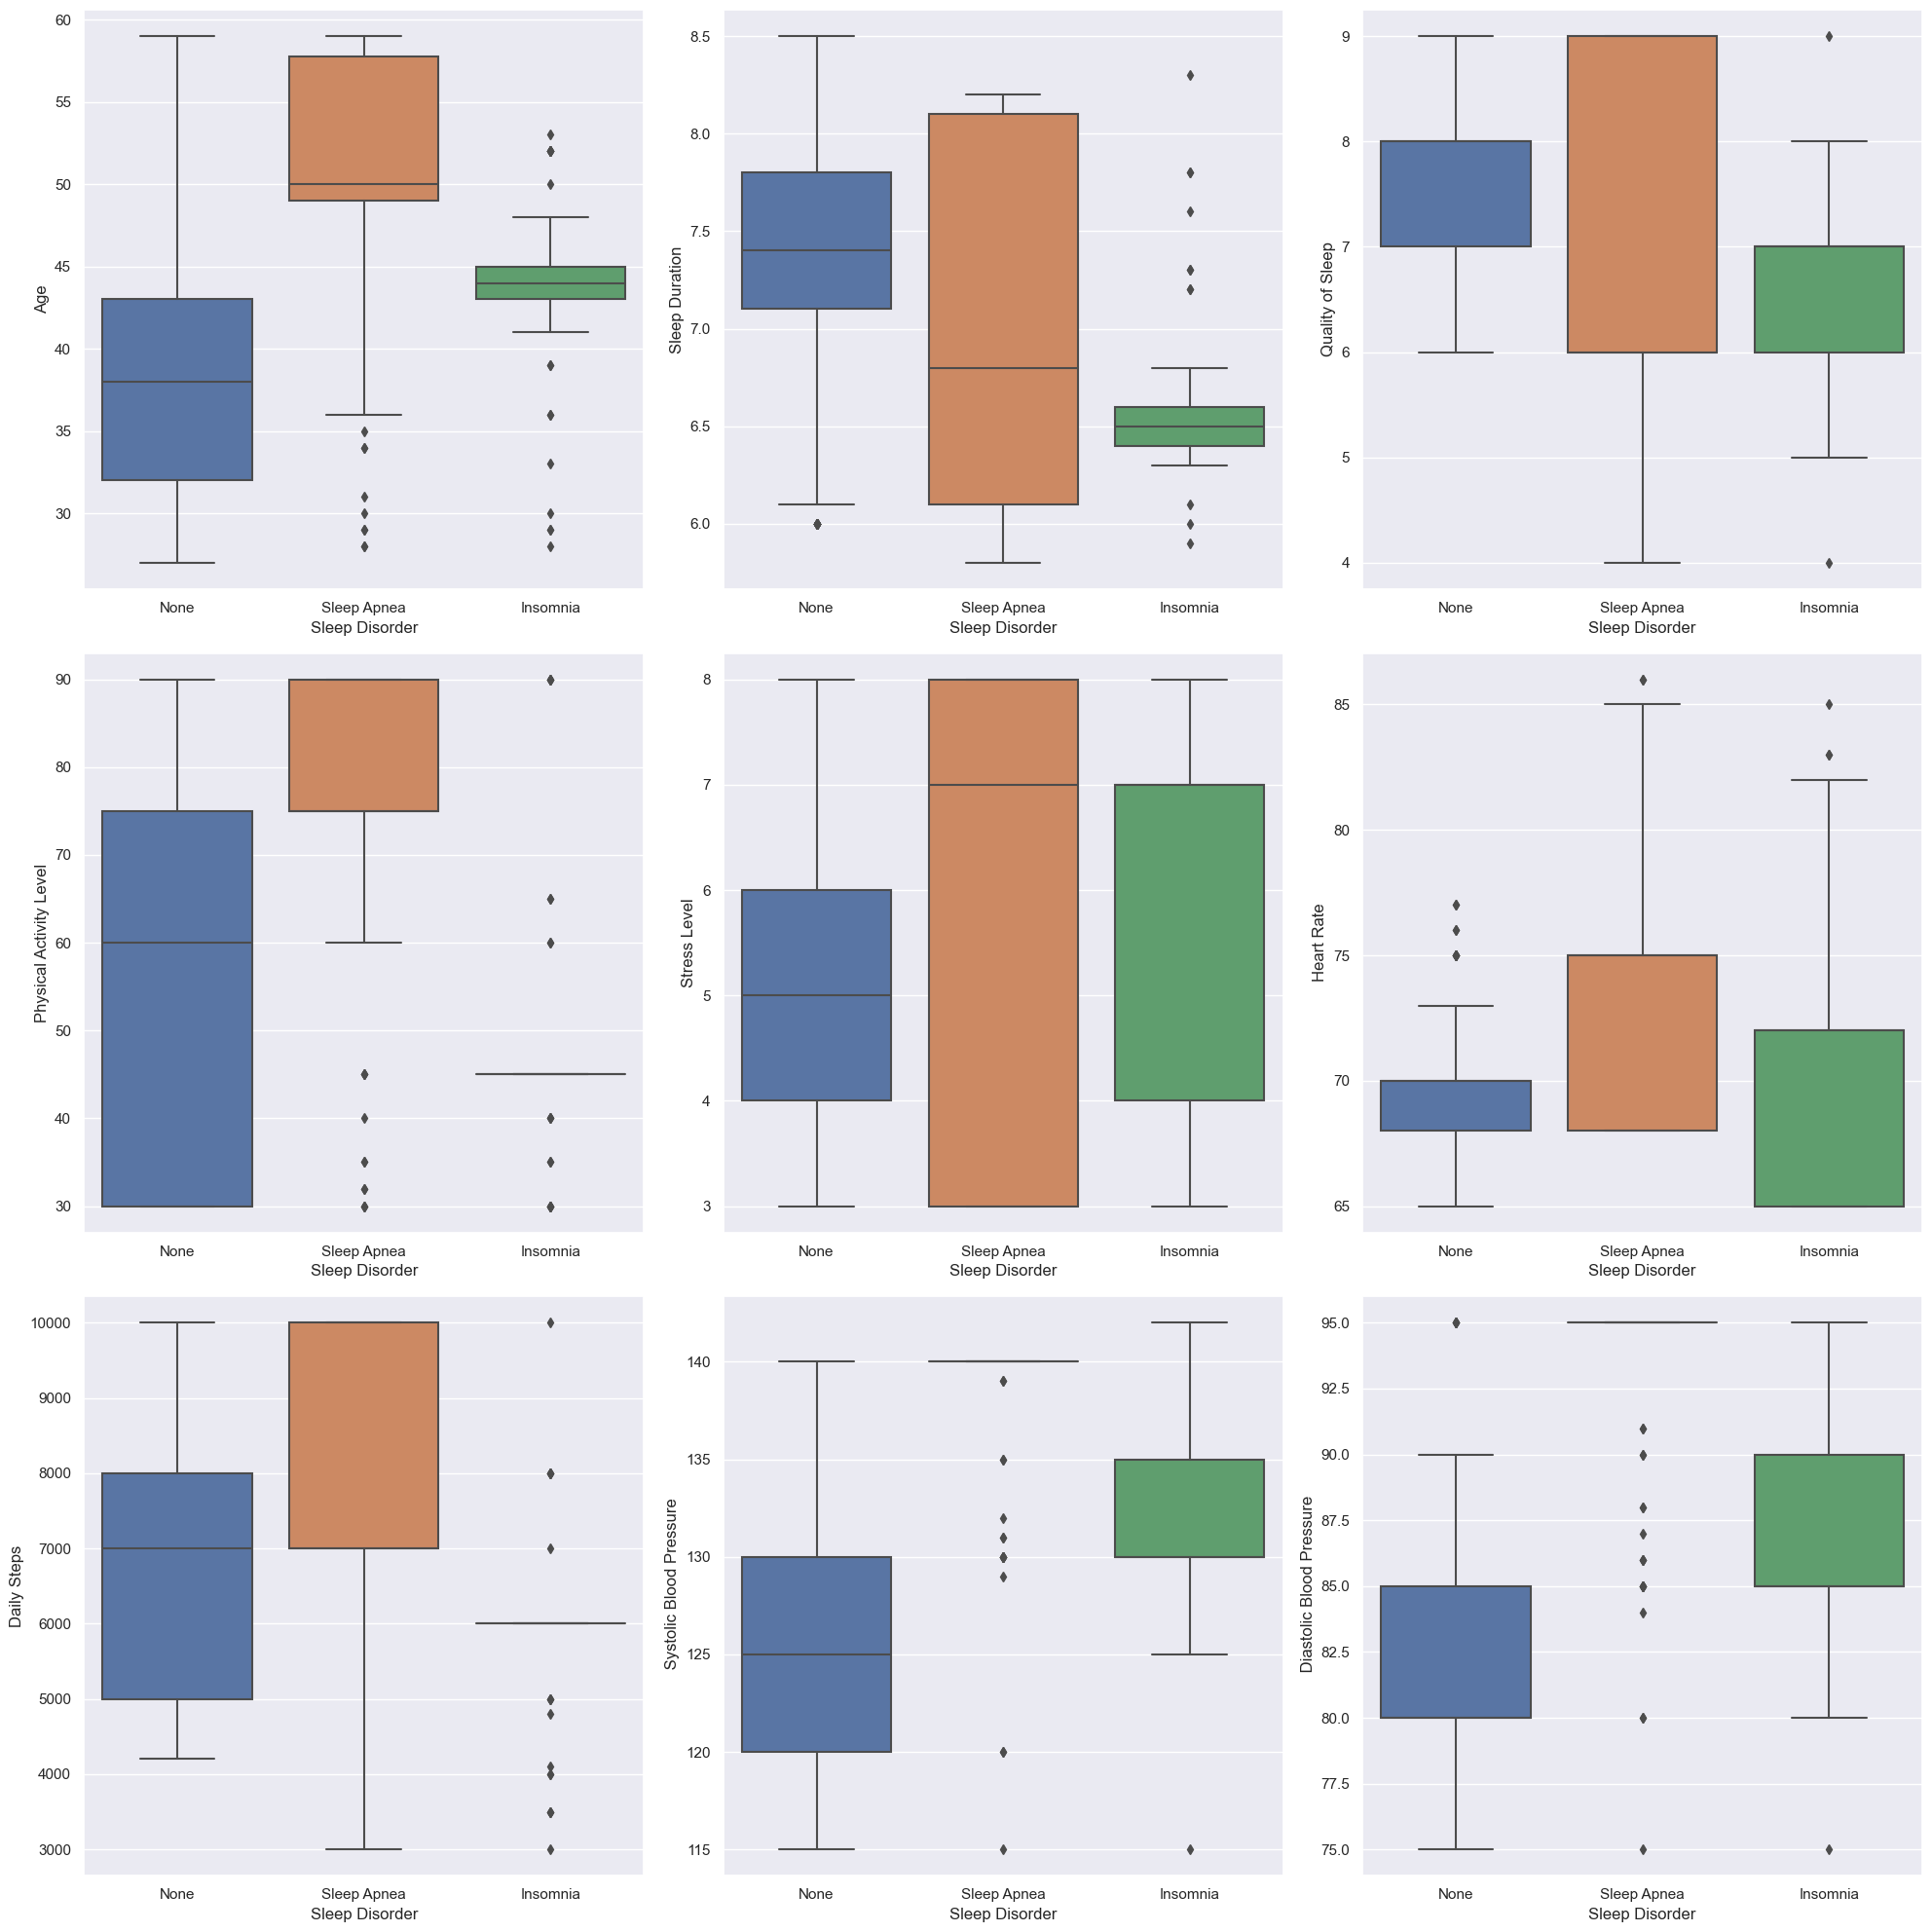

In [55]:
fig ,axs = plt.subplots(nrows = 3 , ncols =3 , figsize = (20,20))
axs = axs.flatten()

for i , var in enumerate(num_vars):
    sb.boxplot(y = var , x ='Sleep Disorder' , data = dataset ,ax = axs[i])
fig.tight_layout()
plt.show()

 From the boxplot we can derive the following :
1)- People that are diagnosed with sleeping disorder usually have less than 7 hours of sleep and signifcantly less quality of .. sleep

2)- Sleep Disorders are more common in people above the age of 45
3)- Tendency for sleep disorders don't necessarily stem from physical activity . People with low physical activity could suffer from sleep disorders .
4)- Sleep Disorders are usually accompanied by increased heart rate which results in a significant increase in blood presssure .

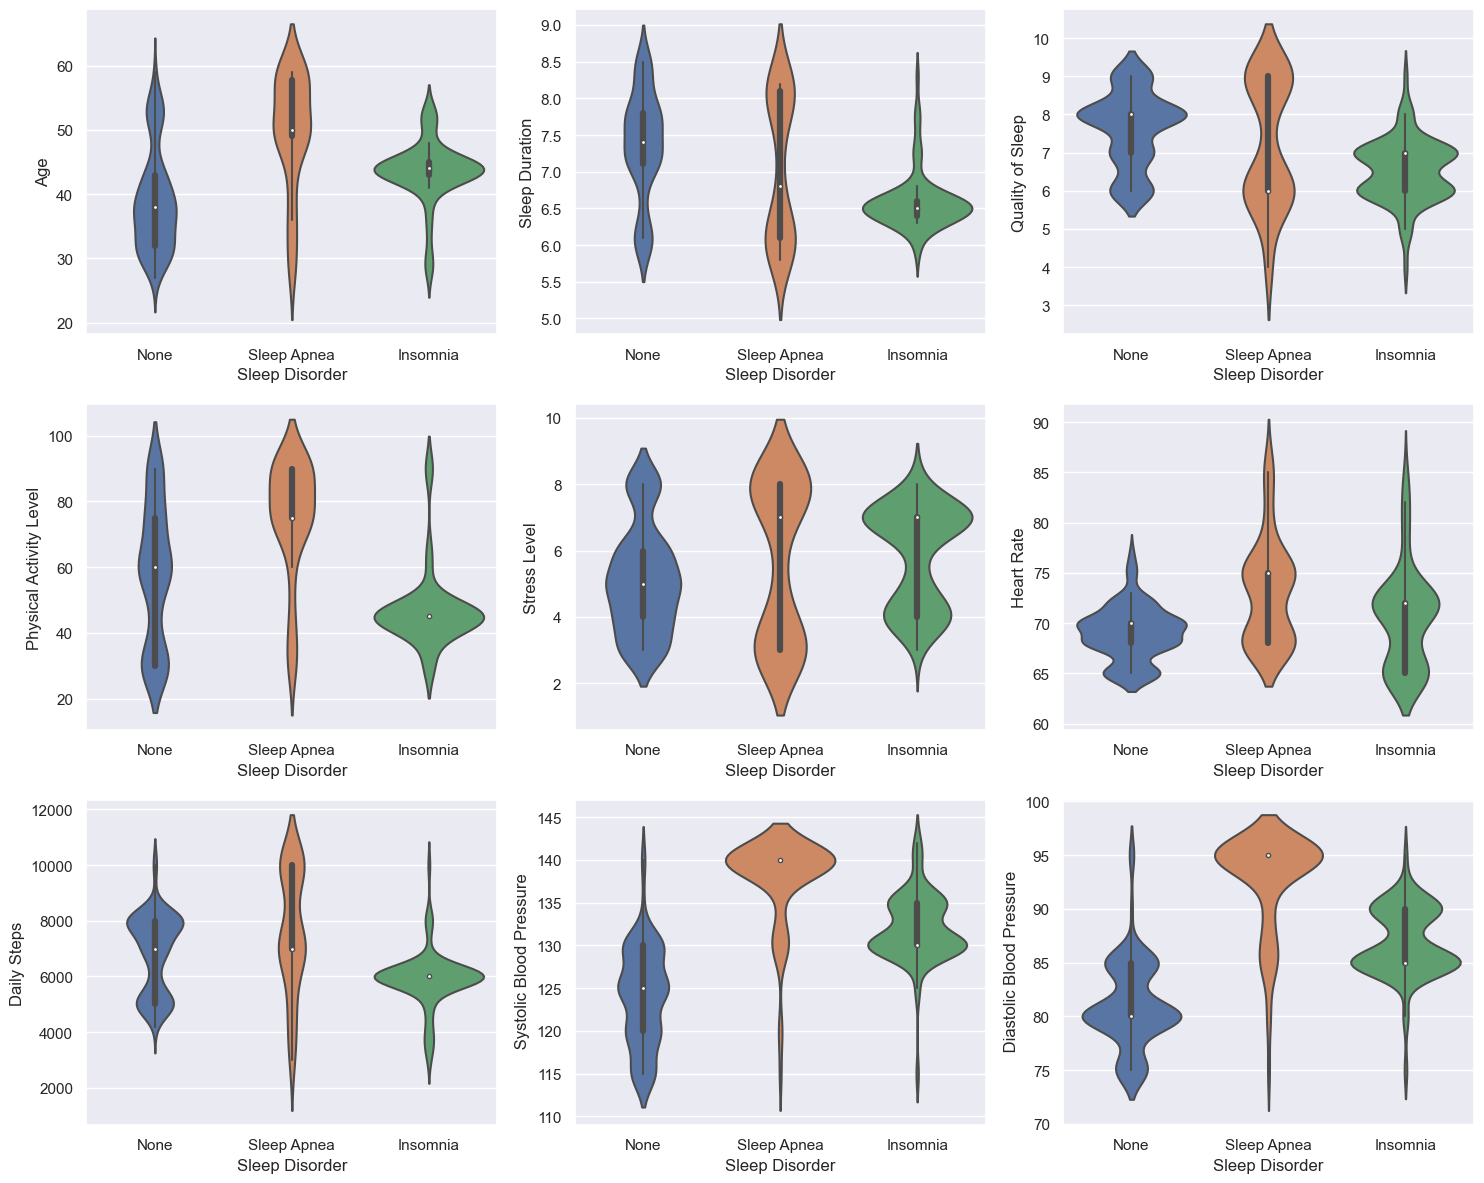

In [61]:
#To show the distribution of people affected by sleep disorders
fig , axs = plt.subplots(nrows = 3 , ncols = 3 , figsize = (15,12))
axs = axs.flatten()
for i , var in enumerate(num_vars):
    sb.violinplot(y = var , data = dataset, x = 'Sleep Disorder', ax = axs[i])
fig.tight_layout()
plt.show()

From the Violin plots we can derive the following :
1)The systolic blood pressure for people suffering sleep disorders clusters aound the value of 130 which is higher than normal
2)The diastolic pressure peaks at 80 and about 85 which are not too far from the normal diastolic blood pressure

## Label Encoding

In [66]:
for col in dataset.select_dtypes(include = ['object']).columns:
    print(f'{col} : {dataset[col].unique()}')

Gender : ['Male' 'Female']
Occupation : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category : ['Overweight' 'Normal' 'Obese']
Blood Pressure : ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder : ['None' 'Sleep Apnea' 'Insomnia']


In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in dataset.select_dtypes(include = ['object']).columns:
    label_encoder.fit(dataset[col].unique())
    
    #transforming the columns using the encoder
    dataset[col] = label_encoder.transform(dataset[col])
    
    #printing the column name and the attributed numerical label
    print(f'{col} : {dataset[col].unique()}')
    
    
    

## Correlation heatmap

<Axes: >

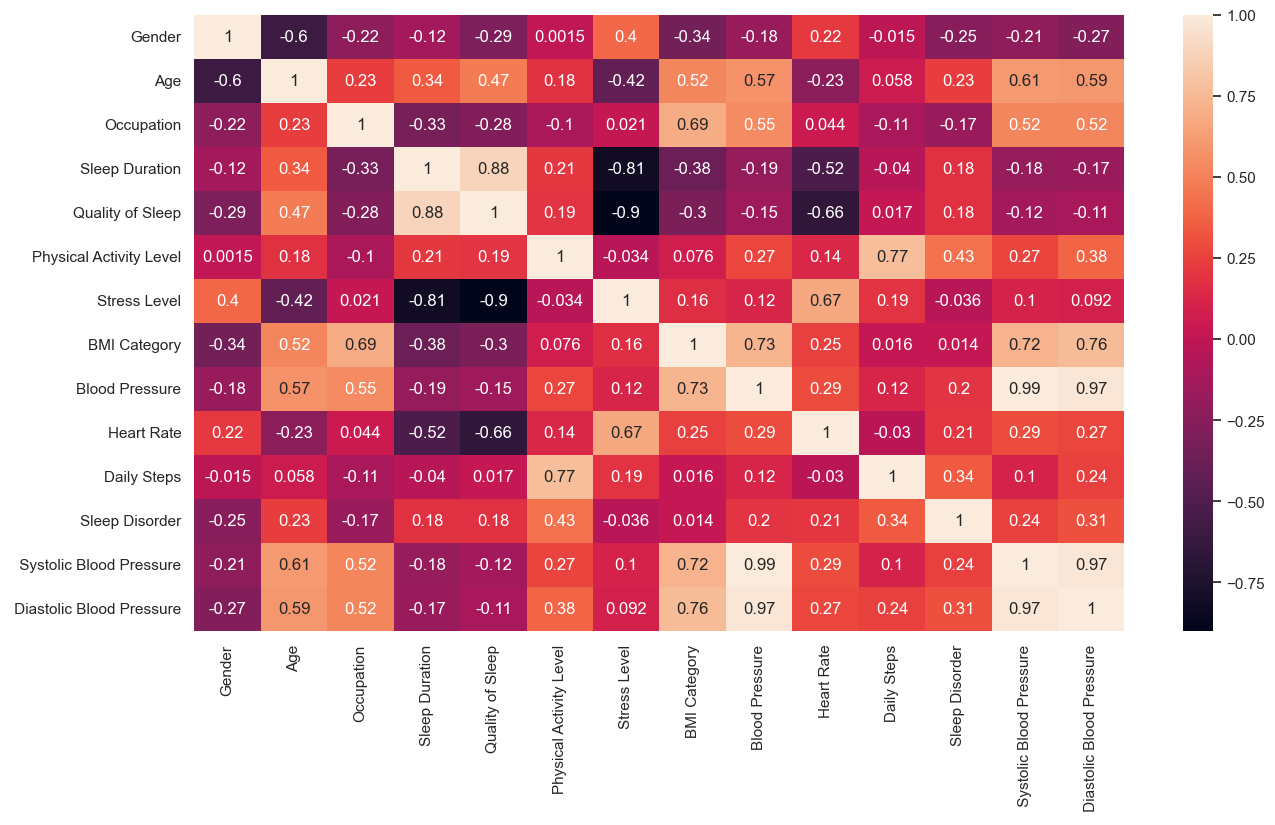

In [72]:
plt.figure(figsize =(15 , 8))
sb.heatmap(dataset.corr() , fmt ='.2g' , annot = True)

From the correlation heatmpa we can derive the following :

1)Blood pressure increases with age in some sense as a result of a median score value
2)Blood Pressure also varies positively with BMI
3)The quality of sleep varies significantly negatively with stress levels as expected
4)The quality of sleep doesn't depend on the physical activity level

## Set selection

In [84]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[: , :-1]
y = dataset.iloc[: , -1]


x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.25)


In [83]:
#Removal of outliers
from scipy import stats

#From the boxplots the heart rate feature is the most plagued with outliers
selected_columns = ['Heart Rate']

z_scores = np.abs(stats.zscore(x_train[selected_columns]))

threshold = 3


outlier_indices = np.where(z_scores >threshold)[0]

x_train = x_train.drop(x_train.index[outlier_indices])
#y_train = y_train.drop(y_train.index[outlier_indices])




(273,)

## Model Building : Model to Indentify people with Sleeping Disorders

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


classifier = DecisionTreeClassifier(class_weight ='balanced')

param_grid ={
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split' :[2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state' : [0,42]
}

grid_search =GridSearchCV(classifier, param_grid , cv = 5 )
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

C:\Users\Gregory Bazuaye\.anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [88]:
classifier = DecisionTreeClassifier(random_state = 42, max_depth = 8, min_samples_split = 2 , min_samples_leaf = 2)
classifier.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, random_state=42)

In [89]:
from sklearn.metrics import confusion_matrix , accuracy_score

y_pred = classifier.predict(x_test)

accuracy = round(accuracy_score(y_test , y_pred)*100 ,2)
print(f'The accuracy score is  {accuracy}  %')

The accuracy score is  93.62  %


In [94]:
from sklearn.metrics import recall_score, f1_score , precision_score , jaccard_score

f1_score = f1_score(y_test,y_pred, average ='micro')
recall_score = recall_score(y_test,y_pred, average ='micro')
jaccard_score = jaccard_score(y_test,y_pred, average ='micro')



data = {
    'Metric': ['F1-score', 'Recall score', 'Jaccard score'],
    'Value': [f1_score, recall_score, jaccard_score]
}

data = pd.DataFrame(data)

data

,Metric,Value
0,F1-score,0.93617
1,Recall score,0.93617
2,Jaccard score,0.88000


In [107]:
import pickle

pickle_out = open('sleep_classifier.pkl', 'wb')
pickle.dump(classifier , pickle_out)
pickle_out.close()

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     374 non-null    int32  
 1   Age                        374 non-null    int64  
 2   Occupation                 374 non-null    int32  
 3   Sleep Duration             374 non-null    float64
 4   Quality of Sleep           374 non-null    int64  
 5   Physical Activity Level    374 non-null    int64  
 6   Stress Level               374 non-null    int64  
 7   BMI Category               374 non-null    int32  
 8   Blood Pressure             374 non-null    int32  
 9   Heart Rate                 374 non-null    int64  
 10  Daily Steps                374 non-null    int64  
 11  Sleep Disorder             374 non-null    int32  
 12   Systolic Blood Pressure   374 non-null    int32  
 13   Diastolic Blood Pressure  374 non-null    int32  